# **Análisis de la varianza a un factor con bloques**

13 de Noviembre 2025

In [1]:
# Sección 1: Importo módulos necesarios para la realización del test
import pandas as pd                                         # Manipulación y análisis de datos
import numpy as np                                          # Cálculos numéricos
import matplotlib.pyplot as plt                             # Gráficos
import seaborn as sns                                       # Visualizaciones estadísticas

from scipy import stats                                     # Pruebas estadísticas
import statsmodels.api as sm                                # Análisis estadístico
from statsmodels.formula.api import ols                     # Ajuste de modelos mediante fórumulas tipo R (por ejemplo, 'y ~ x')
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # Comparaciones múltiples de Tukey

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sección 2: Carga de base de datos

# Nombre del archivo CSV
pFile = '../data/SEMANA03_BASE01_RENDIMIENTO.csv'

# Importo la base de datos
DATA = pd.read_csv(pFile, sep=';', decimal=',', header=0, na_values=[""])
DATA.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Rendimiento,2.35,2.25,2.15,2.05,2.10,2.20,2.10,2.05,1.90,2.00,2.80,2.70,2.65,2.50,2.60,1.90,1.80,1.75,1.65,1.70
Fertilizante,Fosf,Fosf,Fosf,Fosf,Fosf,Mix,Mix,Mix,Mix,Mix,Nit,Nit,Nit,Nit,Nit,Test,Test,Test,Test,Test
Orientacion,C,E,N,O,S,C,E,N,O,S,C,E,N,O,S,C,E,N,O,S


In [3]:
# Sección 3: Base de datos final (sin datos faltantes)

# Columnas a utilizar
pos_vr, pos_factor, pos_bloque = 0, 1, 2
idx  = [pos_vr, pos_factor, pos_bloque]

# Armo la base de datos
nDATA = DATA.iloc[:, idx].dropna()

# Verifico número de filas
print(f"Filas base de datos original:   {DATA.shape[0]}")
print(f"Filas base de datos modificada: {nDATA.shape[0]}")
nDATA.T

Filas base de datos original:   20
Filas base de datos modificada: 20


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Rendimiento,2.35,2.25,2.15,2.05,2.10,2.20,2.10,2.05,1.90,2.00,2.80,2.70,2.65,2.50,2.60,1.90,1.80,1.75,1.65,1.70
Fertilizante,Fosf,Fosf,Fosf,Fosf,Fosf,Mix,Mix,Mix,Mix,Mix,Nit,Nit,Nit,Nit,Nit,Test,Test,Test,Test,Test
Orientacion,C,E,N,O,S,C,E,N,O,S,C,E,N,O,S,C,E,N,O,S


In [4]:
# Sección 4: Obtención de las variables para la realización del modelo

VR      = nDATA.iloc[:, 0]
FACTOR  = nDATA.iloc[:, 1]
BLOQUE  = nDATA.iloc[:, 2]

VR      = pd.to_numeric(VR, errors='coerce')
FACTOR  = FACTOR.astype("category")
BLOQUE  = BLOQUE.astype("category")

In [5]:
# Sección 5: Verificaciones PRE análisis (p1)

# Verificación del tipo de datos de VR
print(f"VR es numérica:         {np.issubdtype(VR.dtype, np.number)}")

# Verificación de FACTOR
print(f"\nFACTOR es categórico:   {pd.api.types.is_categorical_dtype(FACTOR)}")
print(f"Niveles del factor:     {FACTOR.cat.categories}")
print(f"Conteo por nivel:\n     {FACTOR.value_counts()}")

# Verificación de BLOQUE
print(f"\nBLOQUE es categórico:   {pd.api.types.is_categorical_dtype(BLOQUE)}")
print(f"Niveles del bloque:     {BLOQUE.cat.categories}")

VR es numérica:         True

FACTOR es categórico:   True
Niveles del factor:     Index(['Fosf', 'Mix', 'Nit', 'Test'], dtype='object')
Conteo por nivel:
     Fertilizante
Fosf    5
Mix     5
Nit     5
Test    5
Name: count, dtype: int64

BLOQUE es categórico:   True
Niveles del bloque:     Index(['C', 'E', 'N', 'O', 'S'], dtype='object')


In [6]:
# Sección 5: Verificaciones PRE análisis (p2)

# Tabla de doble entrada Factor-Bloque
tabla = pd.crosstab(FACTOR, BLOQUE)
print("Tabla de combinaciones Factor–Bloque\n")
display(tabla)

Tabla de combinaciones Factor–Bloque



Orientacion,C,E,N,O,S
Fertilizante,,,,,
Fosf,1,1,1,1,1
Mix,1,1,1,1,1
Nit,1,1,1,1,1
Test,1,1,1,1,1


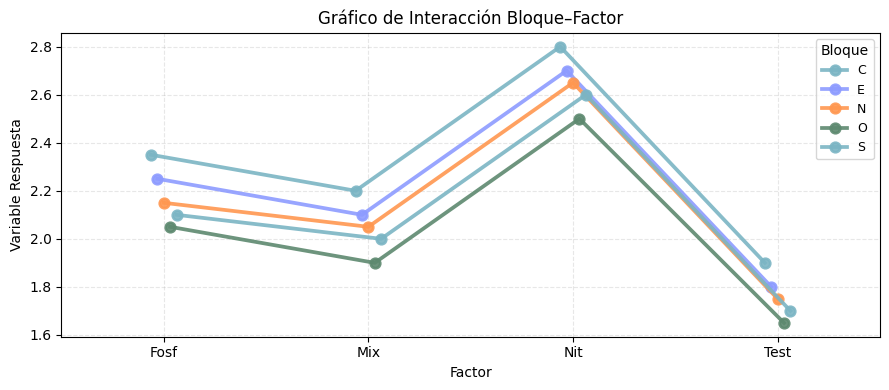

In [7]:
# Sección 5: Verificaciones PRE análisis (p3)

# Gráfico de interacción Bloque–Factor
plt.figure(figsize=(9, 4))
sns.pointplot(x=FACTOR, y=VR, hue=BLOQUE, dodge=True, alpha=0.9, palette=['#7bb5c4', '#8d9bff', '#ff9750', '#5d896f'])
plt.title("Gráfico de Interacción Bloque–Factor", fontsize=12)
plt.xlabel("Factor", fontsize=10)
plt.ylabel("Variable Respuesta", fontsize=10)
plt.legend(title="Bloque", fontsize=9, title_fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [8]:
# Sección 6: ANOVA a 1 Factor con bloques

# DataFrame con los tres nombres de variables
data_anova = pd.DataFrame({'VR': VR, 'FACTOR': FACTOR, 'BLOQUE': BLOQUE})

# Modelo lineal: VR ~ FACTOR + BLOQUE
modelo = ols('VR ~ C(FACTOR) + C(BLOQUE)', data=data_anova).fit()

# ANOVA tipo II (equivalente a R::aov)
anova_tabla = sm.stats.anova_lm(modelo, typ=2)

In [9]:
# Sección 7: Verificación POST análisis (p1)

# Obtención de residuos y valores ajustados
residuos = modelo.resid
ajustados = modelo.fittedvalues

# Verificación de normalidad (Test Shapiro-Wilk)
SHAPIRO = stats.shapiro(residuos)
print(f"Shapiro-Wilk Test (residuos): \t Estadístico = {SHAPIRO.statistic:.4f}\tp-valor = {SHAPIRO.pvalue:.4f}")

# Verificación de homogeneidad de varianzas (Test Bartlett)
BARTLETT = stats.bartlett(*[VR[FACTOR == nivel] for nivel in FACTOR.unique()])
print(f"Test de Bartlett (FACTOR): \t Estadístico = {BARTLETT.statistic:.4f}\tp-valor = {BARTLETT.pvalue:.4f}")

Shapiro-Wilk Test (residuos): 	 Estadístico = 0.9521	p-valor = 0.4006
Test de Bartlett (FACTOR): 	 Estadístico = 0.1863	p-valor = 0.9798


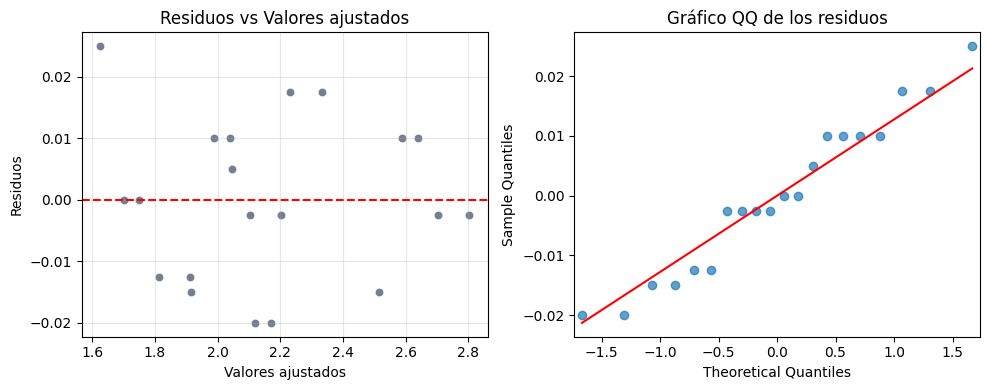

In [10]:
# Sección 7: Verificación POST análisis (p2)

ig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico: Residuos vs Valores ajustados
sns.scatterplot(x=ajustados, y=residuos, ax=axes[0], color="#384860", alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel('Valores ajustados')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Residuos vs Valores ajustados')
axes[0].grid(alpha=0.3)

# Gráfico: QQ-Plot de los residuos
sm.qqplot(residuos, line='s', ax=axes[1], color="#384860", alpha=0.7)
axes[1].set_title('Gráfico QQ de los residuos')

plt.tight_layout()
plt.show()

In [11]:
# Sección 7: Interpretación estadística

# Nivel de significancia
alpha = 0.05

# Tabla ANOVA a 1 factor
print("\nTabla ANOVA:\n", anova_tabla)

# Interpretación
p_value = anova_tabla["PR(>F)"][0]
print(f"p-valor = {p_value:.4f}")

if p_value < alpha:
    print("➡️ Se rechaza H0: existen diferencias significativas entre grupos.")
else:
    print("➡️ No se rechaza H0: no existen diferencias significativas.")


Tabla ANOVA:
             sum_sq    df            F        PR(>F)
C(FACTOR)  2.06300   3.0  2539.076923  4.437776e-17
C(BLOQUE)  0.19175   4.0   177.000000  1.478909e-10
Residual   0.00325  12.0          NaN           NaN
p-valor = 0.0000
➡️ Se rechaza H0: existen diferencias significativas entre grupos.


In [18]:
# Sección 7: Test de Tukey

if p_value < alpha:
    tukey = pairwise_tukeyhsd(endog=VR, groups=FACTOR, alpha=alpha)
    print("\nResultados del test de Tukey:\n", tukey)
else:
    print("\nANOVA no significativo: no se realiza test de Tukey.")


Resultados del test de Tukey:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Fosf    Mix    -0.13 0.2824 -0.3298  0.0698  False
  Fosf    Nit     0.47    0.0  0.2702  0.6698   True
  Fosf   Test    -0.42 0.0001 -0.6198 -0.2202   True
   Mix    Nit      0.6    0.0  0.4002  0.7998   True
   Mix   Test    -0.29 0.0037 -0.4898 -0.0902   True
   Nit   Test    -0.89    0.0 -1.0898 -0.6902   True
----------------------------------------------------


In [13]:
# Sección 8: Generación de Tablas (extras p1)

n_total = len(nDATA)
k = len(FACTOR.cat.categories)

print(f"Cantidad de datos totales:\t{n_total}")
print(f"Cantidad de niveles:\t\t{k}")

gl_total  = n_total - 1
gl_factor = k - 1
gl_error  = n_total - k

print(f"\nGrados de libertad total:\t{gl_total}")
print(f"Grados de libertad factor:\t{gl_factor}")
print(f"Grados de libertad residuos:\t{gl_error}")

Cantidad de datos totales:	20
Cantidad de niveles:		4

Grados de libertad total:	19
Grados de libertad factor:	3
Grados de libertad residuos:	16


In [14]:
# Sección 8: Generación de Tablas (extras p2)

print("\nMedidas de posición de VR")
display(VR.describe().to_frame().T.round(4))

print("\nMedidas de dispersión de VR")
print(f"Desvío estándar:\t{VR.std():.4f}")
print(f"Varianza:       \t{VR.var():.4f}")
print(f"Error estándar:\t{VR.std() / np.sqrt(n_total):.4f}")


Medidas de posición de VR


,count,mean,std,min,25%,50%,75%,max
Rendimiento,20.0,2.16,0.3447,1.65,1.9,2.1,2.3875,2.8



Medidas de dispersión de VR
Desvío estándar:	0.3447
Varianza:       	0.1188
Error estándar:	0.0771


In [15]:
# Sección 8: Generación de Tablas (extras p3)

print("\nMedias por nivel")
display(VR.groupby(FACTOR).mean().to_frame().T.round(4))

print("\nDesvios por nivel")
display(VR.groupby(FACTOR).std().to_frame().T.round(4))

print("\nError estándar por nivel")
display(VR.groupby(FACTOR).std() / np.sqrt(VR.groupby(FACTOR).count()).to_frame().T.round(4))


Medias por nivel


Fertilizante,Fosf,Mix,Nit,Test
Rendimiento,2.18,2.05,2.65,1.76



Desvios por nivel


Fertilizante,Fosf,Mix,Nit,Test
Rendimiento,0.1204,0.1118,0.1118,0.0962



Error estándar por nivel


Fertilizante,Fosf,Mix,Nit,Test
Rendimiento,0.053851,0.049999,0.049999,0.043011


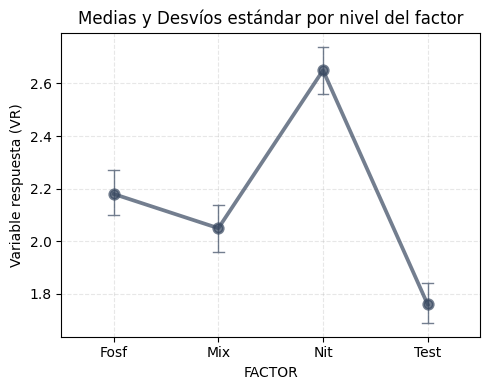

In [16]:
# Sección 9: Gráfico por nivel de factor

plt.figure(figsize=(5, 4))
sns.pointplot(x=FACTOR, y=VR, capsize=.1, errwidth=1, color="#384860", alpha=0.7)
plt.title("Medias y Desvíos estándar por nivel del factor", fontsize=12)
plt.xlabel("FACTOR", fontsize=10)
plt.ylabel("Variable respuesta (VR)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()